In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import utilities as u
import single_session_plots as ssp
import numpy as np
import scipy as sp
import sklearn as sk
from matplotlib import pyplot as plt
from LatentVarFuncs import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# import behavioral sessions
mouse = '4139190.1'
df = u.load_session_db()
#ca1mice = ['4139190.1','4139190.3', '4054011.1','4139202.2']
#dgmice = ['4054010.4','4054010.5']


df = df[df['RewardCount']>10]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse = df_mouse.sort_values(['DateTime'])
df_mouse


MouseName  DateFolder  SessionNumber             Track  RewardCount  \
150  4139190.1  16_06_2018              2  TwoTower_Timeout           19   
210  4139190.1  19_06_2018              2  TwoTower_Timeout           75   
175  4139190.1  21_06_2018              3  TwoTower_Timeout           92   
177  4139190.1  21_06_2018              2  TwoTower_Timeout           20   
169  4139190.1  24_06_2018              2  TwoTower_Timeout          104   
173  4139190.1  25_06_2018              2  TwoTower_Timeout           62   
205  4139190.1  27_06_2018              2  TwoTower_Timeout           81   
160  4139190.1  28_06_2018              8  TwoTower_Timeout           22   
164  4139190.1  28_06_2018              2  TwoTower_Timeout           17   
165  4139190.1  28_06_2018              9  TwoTower_Timeout           18   
4    4139190.1  11_07_2018             17  TwoTower_Timeout           58   
225  4139190.1  11_07_2018             17  TwoTower_Timeout           58   

     Imaging   DateTime                                          data file  \
150        1 2018-06-16  G:\My Drive\\VR_Data\TwoTower\4139190.1\16_06_...   
210        1 2018-06-19  G:\My Drive\\VR_Data\TwoTower\4139190.1\19_06_...   
175        1 2018-06-21  G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...   
177        1 2018-06-21  G:\My Drive\\VR_Data\TwoTower\4139190.1\21_06_...   
169        1 2018-06-24  G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...   
173        1 2018-06-25  G:\My Drive\\VR_Data\TwoTower\4139190.1\25_06_...   
205        1 2018-06-27  G:\My Drive\\VR_Data\TwoTower\4139190.1\27_06_...   
160        1 2018-06-28  G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...   
164        1 2018-06-28  G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...   
165        1 2018-06-28  G:\My Drive\\VR_Data\TwoTower\4139190.1\28_06_...   
4          1 2018-07-11  G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...   
225        1 2018-07-11  G:\My Drive\\VR_Data\TwoTower\4139190.1\11_07_...   

                                              scanfile  \
150  G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...   
210  G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...   
175  G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...   
177  G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...   
169  G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...   
173  G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...   
205  G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...   
160  G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...   
164  G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...   
165  G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...   
4    G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...   
225  G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...   

                                               scanmat  
150  G:\My Drive\2P_Data\TwoTower\4139190.1\16_06_2...  
210  G:\My Drive\2P_Data\TwoTower\4139190.1\19_06_2...  
175  G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...  
177  G:\My Drive\2P_Data\TwoTower\4139190.1\21_06_2...  
169  G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...  
173  G:\My Drive\2P_Data\TwoTower\4139190.1\25_06_2...  
205  G:\My Drive\2P_Data\TwoTower\4139190.1\27_06_2...  
160  G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...  
164  G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...  
165  G:\My Drive\2P_Data\TwoTower\4139190.1\28_06_2...  
4    G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...  
225  G:\My Drive\2P_Data\TwoTower\4139190.1\11_07_2...

In [3]:
# pick candidate session
sess = df_mouse.iloc[4]
sess

MouseName                                                4139190.1
DateFolder                                              24_06_2018
SessionNumber                                                    2
Track                                             TwoTower_Timeout
RewardCount                                                    104
Imaging                                                          1
DateTime                                       2018-06-24 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139190.1\24_06_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2...
Name: 169, dtype: object

G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:479: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_m

G:\My Drive\2P_Data\TwoTower\4139190.1\24_06_2018\TwoTower_Timeout\TwoTower_Timeout_2_000.mat
#subsystem#not made into numpy array


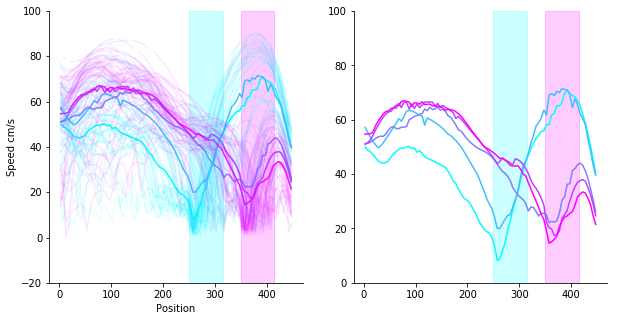

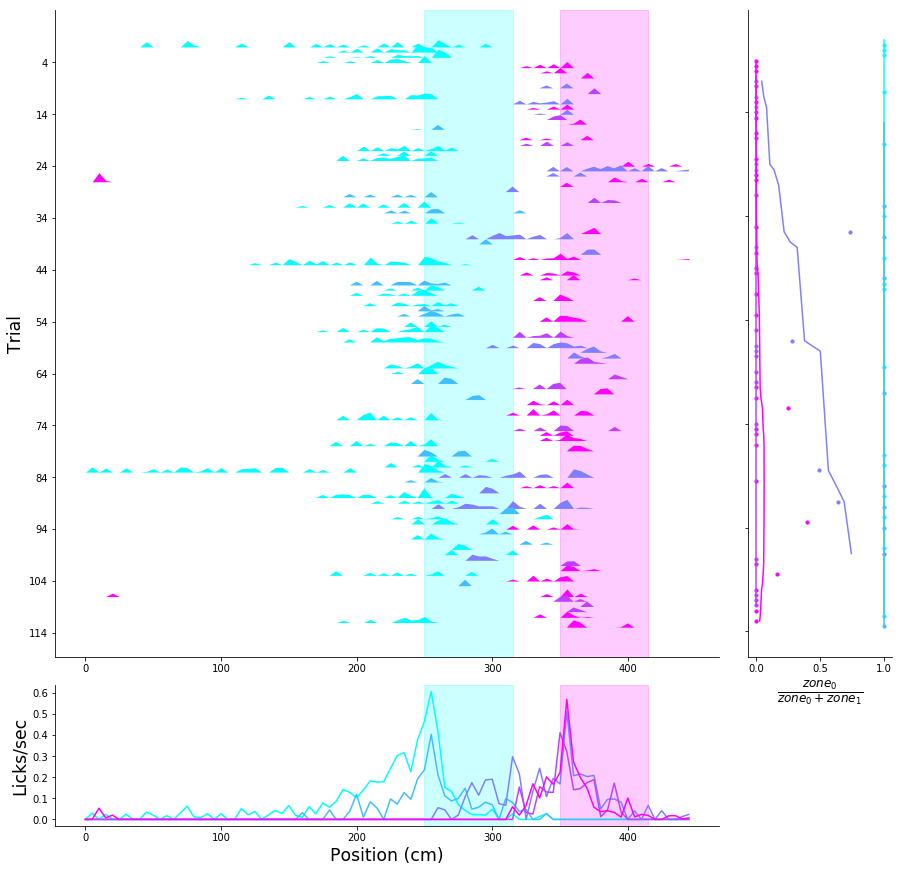

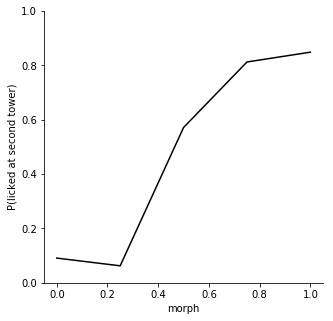

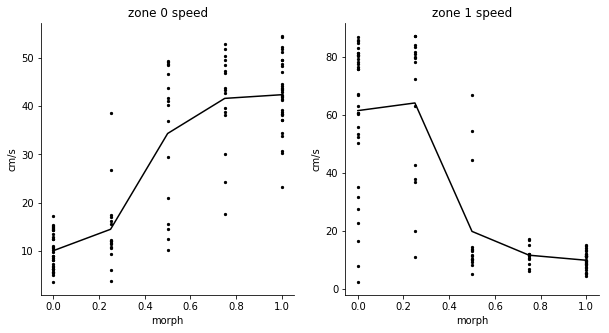

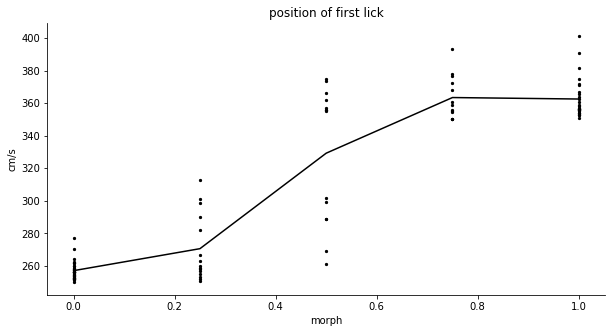

In [4]:
# get behavior and imaging data
behav = u.behavior_dataframe(sess['data file'],sess['scanmat'],concat=False)
tmp = ssp.run_behavior(behav,ratio = True)

info = u.loadmat_sbx(sess['scanmat'])['info']
ca_dat = u.load_ca_mat(sess['scanfile'])

C = ca_dat['C_keep'][info['frame'][0]:info['frame'][-1]+1]

frame_diff = behav.shape[0]-C.shape[0]
if frame_diff>0:
    behav = behav.iloc[:-frame_diff]
    
    
C_z = sp.stats.zscore(C,axis=0)

In [5]:
#  
dmat = pos_morph_design_matrix(behav['pos']._values,behav['morph']._values)
train_inds = ((behav['morph']==1) | (behav['morph']==0)) & (behav['pos']>0)
dmat_extreme = dmat[train_inds,:]
C_extreme = C_z[train_inds,:]

glm = sk.linear_model.LinearRegression()

# for cells in session
glm.fit(dmat_extreme,C_extreme)
mu_extreme_hat = glm.predict(dmat_extreme)


0.05298202177909202
(36959, 1637)


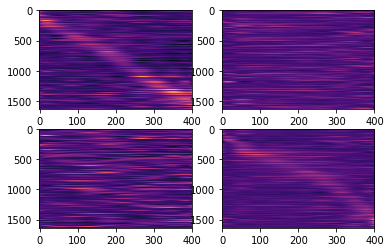

In [6]:
# check that you get place cell like things
print(glm.score(dmat_extreme,C_extreme))
print(C_z.shape)
f,ax = plt.subplots(2,2)
x = np.linspace(0,450,400)
basis0 = pos_morph_design_matrix(x,np.zeros([x.shape[0],]))
basis1 = pos_morph_design_matrix(x,np.ones([x.shape[0],]))
yhat0 = glm.predict(basis0)
yhat1 = glm.predict(basis1)

maxinds0,maxinds1 = np.argmax(yhat0,axis=0),np.argmax(yhat1,axis=0)
maxsort0,maxsort1 = np.argsort(maxinds0),np.argsort(maxinds1)
for i in range(0,C_z.shape[1],50):
    
    #for cell in range(yhat0.shape[1]):
    #    yhat0[:,cell] = yhat0[:,cell]/yhat0[:,cell].sum()
    #    yhat1[:,cell] = yhat1[:,cell]/yhat1[:,cell].sum()
    
    ax[0,0].imshow(yhat0[:,maxsort0].T,aspect='auto',cmap='magma')
    ax[0,1].imshow(yhat1[:,maxsort0].T,aspect='auto',cmap='magma')
    
    ax[1,0].imshow(yhat0[:,maxsort1].T,aspect='auto',cmap='magma')
    ax[1,1].imshow(yhat1[:,maxsort1].T,aspect='auto',cmap='magma')



In [7]:
# get position transition probabilities
pos = behav['pos']._values
# bin positions in 5 cm
bin_edges = [0]
for i in range(5,460,5):
    bin_edges.append(i)
bin_edges = np.array(bin_edges)
pos_binned1 = np.digitize(pos[behav['morph']==1],bin_edges,right=True)
pos_binned0 = np.digitize(pos[behav['morph']==0],bin_edges,right=True)

#transition matrix
p_xx_i1 = np.zeros([len(bin_edges),len(bin_edges)])
p_xx_i0 = np.zeros([len(bin_edges),len(bin_edges)])

for b in np.unique(pos_binned1).tolist():
    inds = np.where(pos_binned1==b)[0]
    xx = pos_binned1[(inds+1)%pos_binned1.shape[0]]
    next_inds = np.unique(xx)
    bcount = np.bincount(xx)
    bcount = bcount[bcount>0]
    
    p_xx_i1[b,next_inds] = bcount/bcount.sum()
    # for each bin
        # prob that next time point is in each bin
        
for b in np.unique(pos_binned0).tolist():
    inds = np.where(pos_binned0==b)[0]
    xx = pos_binned0[(inds+1)%pos_binned0.shape[0]]
    next_inds = np.unique(xx)
    bcount = np.bincount(xx)
    bcount = bcount[bcount>0]
    
    p_xx_i0[b,next_inds] = bcount/bcount.sum()
        
pos_binned = np.digitize(pos,bin_edges,right=True)



In [8]:
# means for binned positions for all cells
mu_i0 = glm.predict(pos_morph_design_matrix(bin_edges,np.zeros([bin_edges.shape[0],])))


# likelihood of data given true trajectory
#l_i0 = gaussian_pdf(C_z,mu_i0,1) 
#l_i0 = np.maximum(l_i0,.05)


# mean in case that all morphs are 1
mu_i1 = glm.predict(pos_morph_design_matrix(bin_edges,np.ones([bin_edges.shape[0],])))

# likelihood
#l_i1 = gaussian_pdf(C_z,mu_i1,1)
#l_i1 = np.maximum(l_i1,.05)


# get start and stop indices
tstarts,tstops = np.where(behav['tstart']==1)[0],np.where(behav['teleport']==1)[0]
trial_pos = []
for start,stop in zip(tstarts,tstops):
    trial_pos.append(pos[start:stop-1])
#trial_l0, trial_l1 = [], []
trial_C_z = []
for (start,stop) in zip(tstarts,tstops):
 #   trial_l0.append(l_i0[start:stop,:])
  #  trial_l1.append(l_i1[start:stop,:])
    trial_C_z.append(C_z[start:stop,:])

d = u.by_trial_info(behav)
print(d.keys())
mask = (d['morphs']==0) | (d['morphs']==1)
#for key in d.keys():
#    d[key] = d[key][mask]

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:479: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


In [9]:
# run single cell decoder
post_i0x_y, post_i1x_y= [],[]
post_i0 ,post_i1 = [],[]
dx = 5
for trial,I  in enumerate(d['morphs']):
    if trial%5==0:
        print(trial)
        
        
    cz = trial_C_z[trial]
    post_trial0, post_trial1 = [],[]
    for j in range(cz.shape[0]):
        if j==0: # if first timepoint, set initial conditions
            
            # set probability of being in current position to 1
            onehot = .001*np.ones([p_xx_i0.shape[1],1])
            onehot[0] = 1.
            onehot = onehot/onehot.ravel().sum()
            
            # multiply by likelihood and prior on being in context
            #tmp0 = .5*np.dot(onehot,trial_l0[trial][j,:][np.newaxis])
            #tmp1 = .5*np.dot(onehot,trial_l1[trial][j,:][np.newaxis])
            tmp0 = .5*np.dot(onehot,np.ones([1,cz.shape[1]]))
            tmp1 = .5*np.dot(onehot,np.ones([1,cz.shape[1]]))
                            
            
            # normalization factor
            tmp_denom = tmp0.sum(axis=0)+tmp1.sum(axis=0)
            tmp_denom = np.dot(np.ones([p_xx_i0.shape[0],1]),tmp_denom[np.newaxis])

            # posterior having observed 1 time frame
            Z0_t = np.divide(tmp0,tmp_denom)
            Z1_t = np.divide(tmp1,tmp_denom)
            



        # calculate integrand - belief state transition prob x position transition matrix x posterior at previous timepoint
        a = .6
        b = .6

        ## single cell decoding
        XZ0 = np.dot(p_xx_i0.T,a*Z0_t) + np.dot(p_xx_i1.T,(1-a)*Z1_t)
        XZ1 = np.dot(p_xx_i0.T,(1-b)*Z0_t) + np.dot(p_xx_i1.T,b*Z1_t)

        # make activity into a matrix and means at each position into a matrix in order to calculate likelihoods
        CZX = np.matlib.repmat(cz[j,:],mu_i0.shape[0],1)
        
        l0 = gaussian_pdf(CZX,mu_i0,1)
        l1 = gaussian_pdf(CZX,mu_i1,1)
        denom = np.matlib.repmat(l0.sum(axis=0) + l1.sum(axis=0),mu_i0.shape[0],1)
        l0 = np.divide(l0,denom)
        l1 = np.divide(l1,denom)
        
        #print(l0.shape)
                                                                                      
        # numerator of new posterior
        #tmpnum0 = np.multiply(XZ0,np.matlib.repmat(trial_l0[trial][j,:],p_xx_i0.shape[0],1))
        tmpnum0 = np.multiply(XZ0,l0)
        #tmpnum1= np.multiply(XZ1,np.matlib.repmat(trial_l1[trial][j,:],p_xx_i1.shape[0],1))
        tmpnum1= np.multiply(XZ1,l1)

        # normalization factor for updated posterior
        tmp_denom = tmpnum0.sum(axis=0)+tmpnum1.sum(axis=0)
        tmp_denom = np.dot(np.ones([p_xx_i0.shape[0],1]),tmp_denom[np.newaxis])

        # new posterior
        Z0_t = np.divide(tmpnum0,tmp_denom)
        Z1_t = np.divide(tmpnum1,tmp_denom)


        # add to list for trial
        post_trial0.append(Z0_t)
        post_trial1.append(Z1_t)

    # append trials posterior to list
    post_i0x_y.append(np.array(post_trial0))
    post_i1x_y.append(np.array(post_trial1))
    # sum across positions to get posterior of context
    post_i1.append(np.squeeze(np.array(post_trial1).sum(axis=1)))
    post_i0.append(np.squeeze(np.array(post_trial0).sum(axis=1)))

0
5
10
15
20
25
30
35
40
45


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


50
55
60
65
70
75
80
85
90
95
100
105
110


In [14]:
# calculate likelihoods from single cells
II = np.array([[a, 1-a],[1-b,b]])
for cell in range(2): #C_z.shape[1]):
    # for each trial
    for trial,CZ in enumerate(trial_C_z[0:1]):
        # get activity and expected mean
        cz = CZ[:,cell]
        C0 = np.matlib.repmat(cz[np.newaxis].T,1,mu_i0.shape[0]).T
        MUI0 = np.matlib.repmat(mu_i0[:,cell][np.newaxis].T,1,cz.shape[0])
        
        
        C1 = np.matlib.repmat(cz[np.newaxis].T,1,mu_i1.shape[0]).T
        MUI1 = np.matlib.repmat(mu_i0[:,cell][np.newaxis].T,1,cz.shape[0])
        
        
        # get likelihood (NxT)
        L_I0 = gaussian_pdf(C0,MUI0,1)
        L_I1 = gaussian_pdf(C1,MUI1,1)
        
        
        LY = forward_procedure_single_cell(p_xx_i0.T,p_xx_i1.T,L_I0,L_I1,II)
        

NameError: name 'XX_IO' is not defined

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


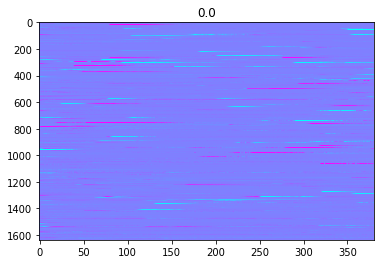

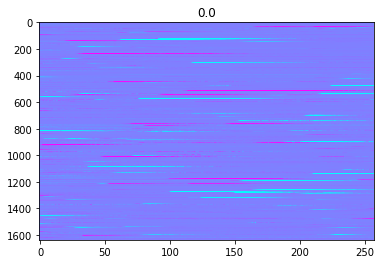

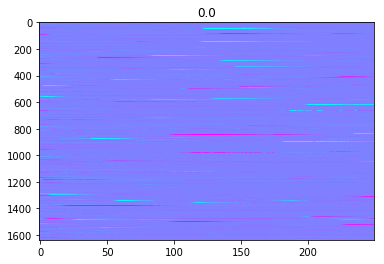

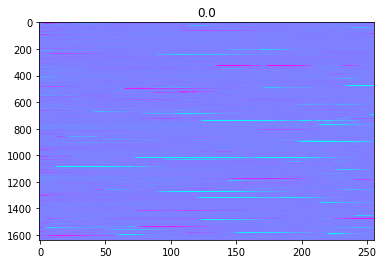

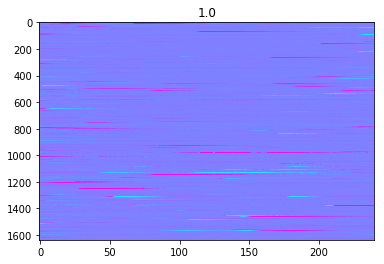

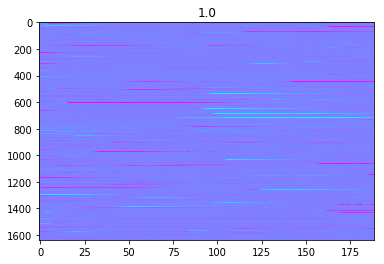

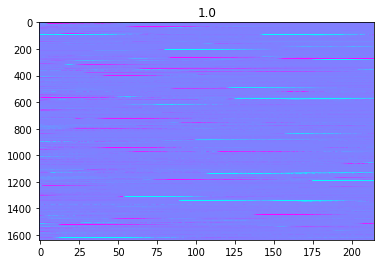

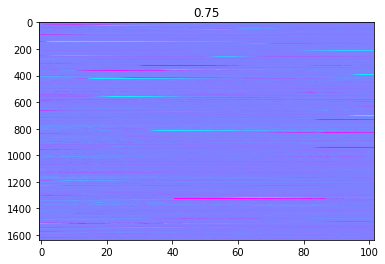

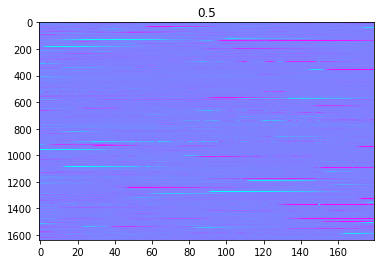

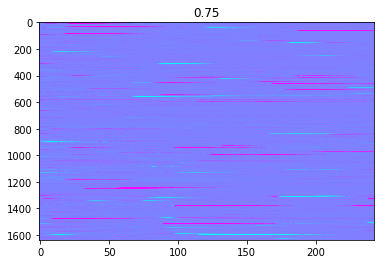

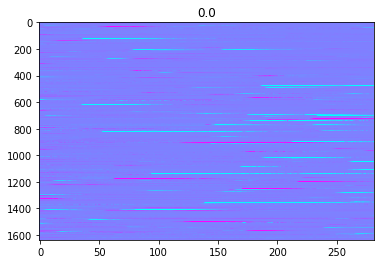

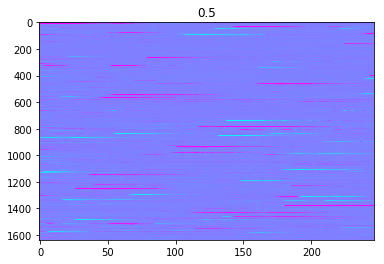

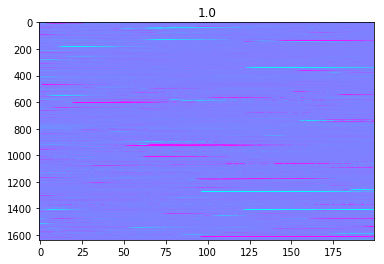

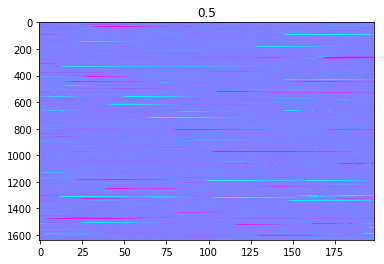

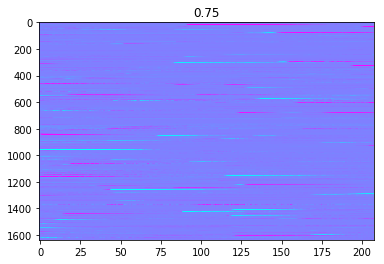

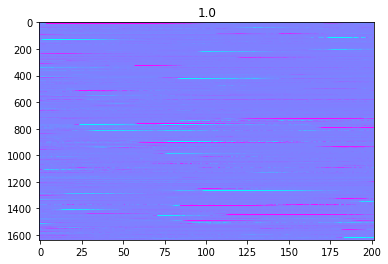

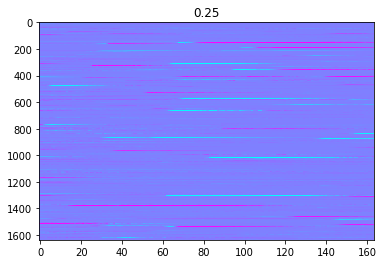

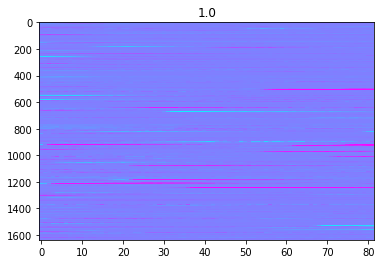

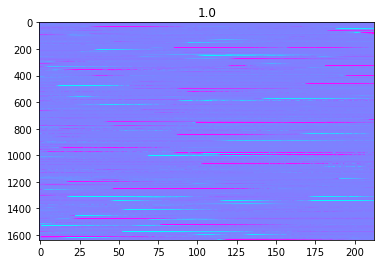

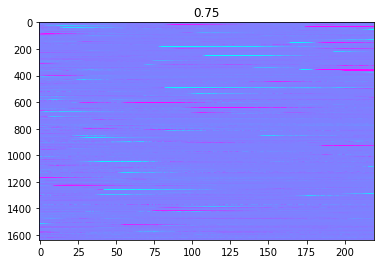

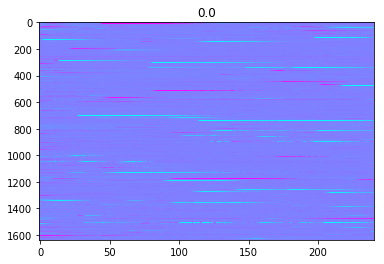

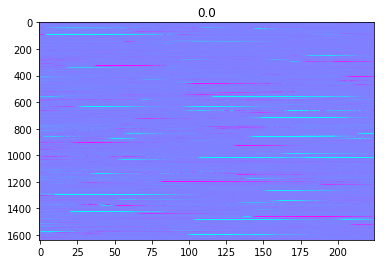

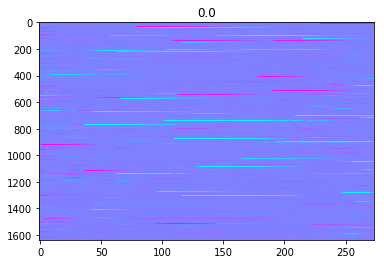

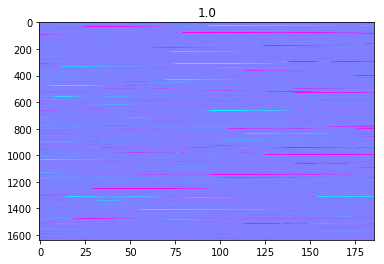

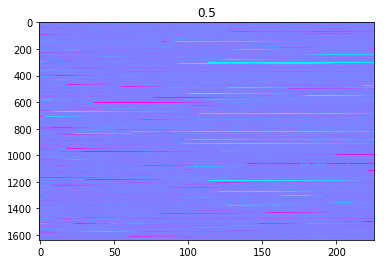

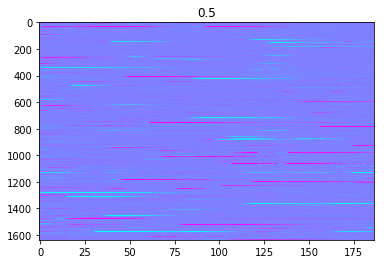

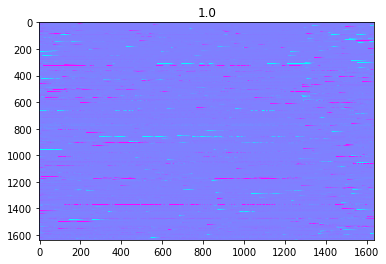

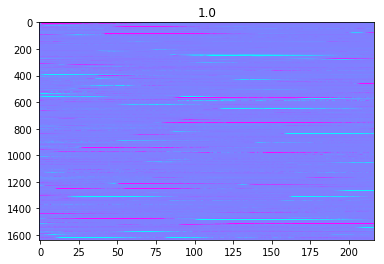

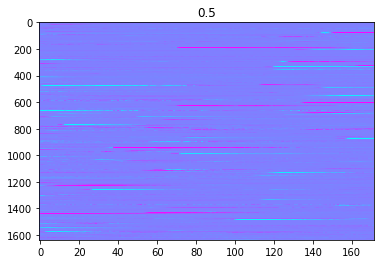

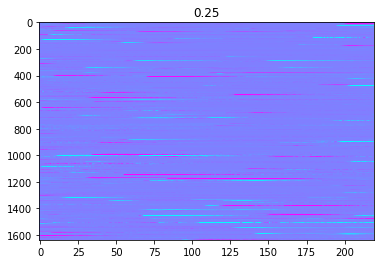

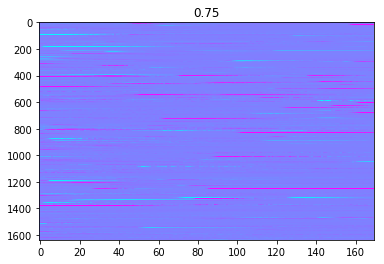

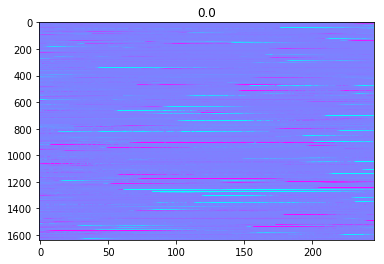

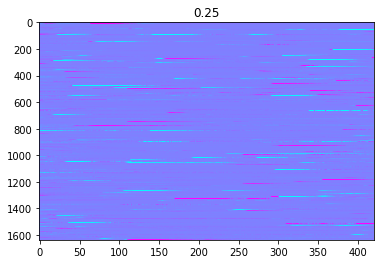

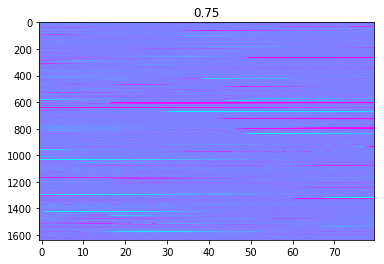

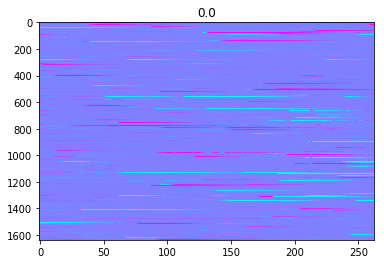

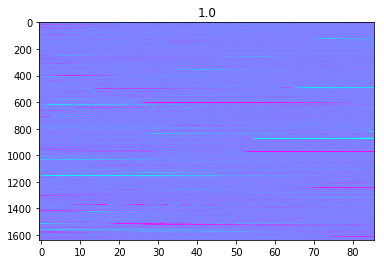

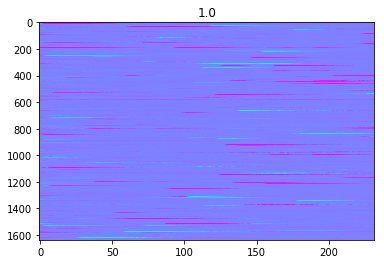

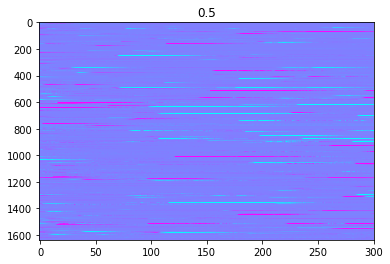

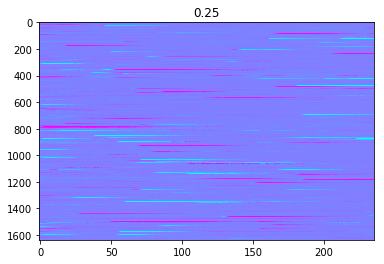

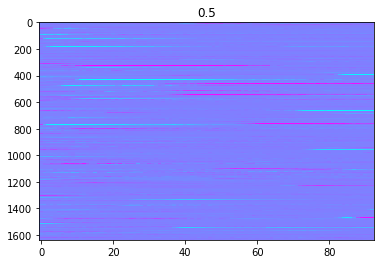

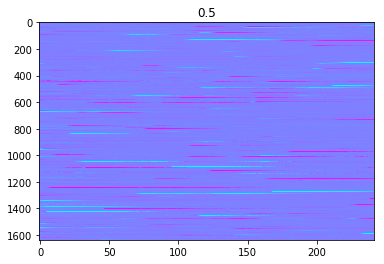

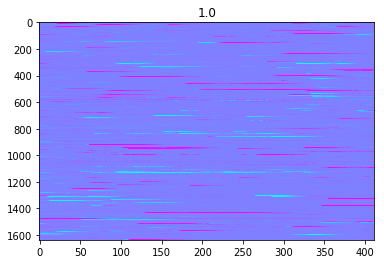

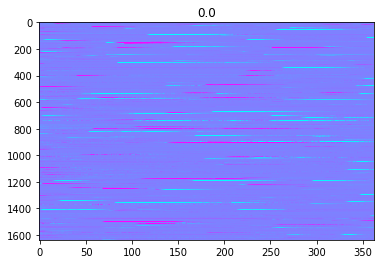

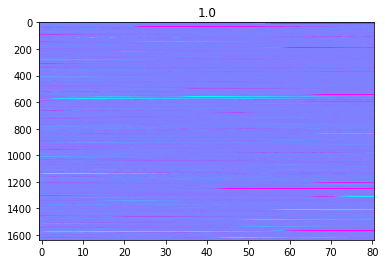

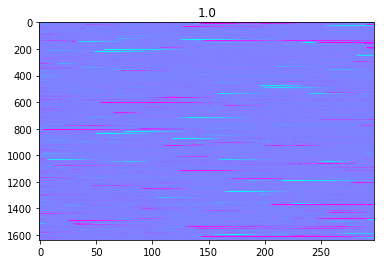

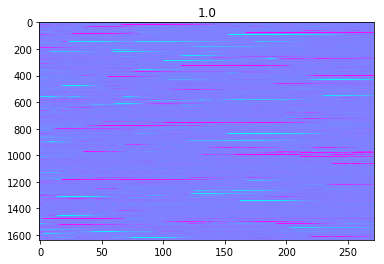

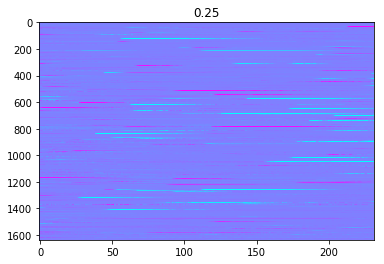

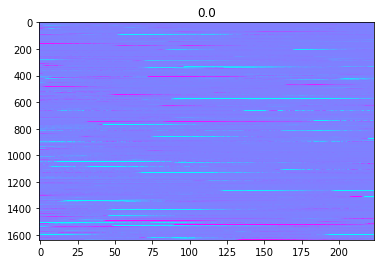

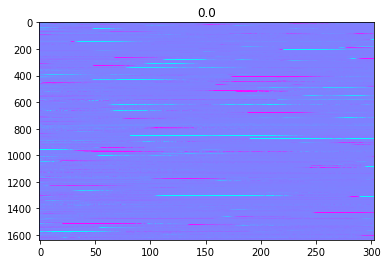

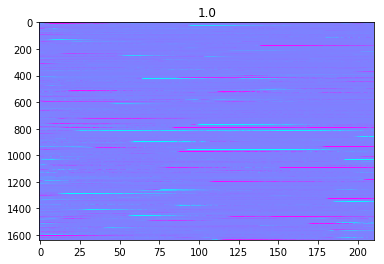

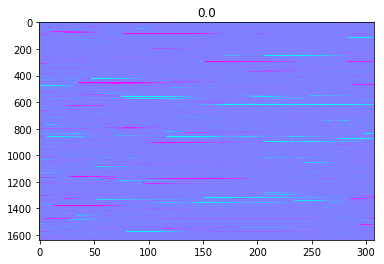

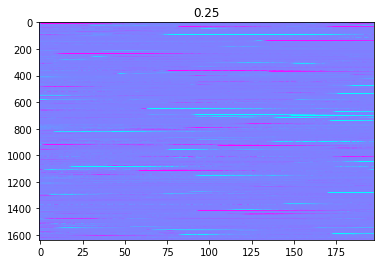

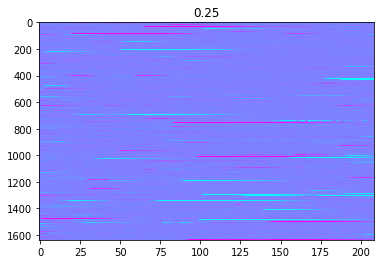

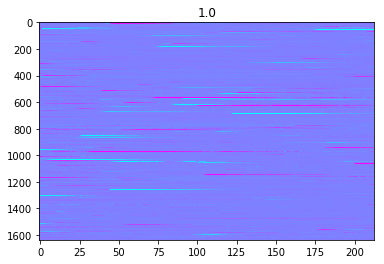

In [101]:
for i, (tmppost, tmppos,m) in enumerate(zip(post_i1,trial_pos,d['morphs'])):
    #if m>0 and m<1:
    f,ax = plt.subplots()
    ax.imshow(tmppost.T,aspect='auto',cmap='cool',vmin=0,vmax=1)
    ax.set_title(m)

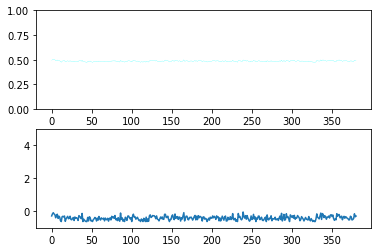

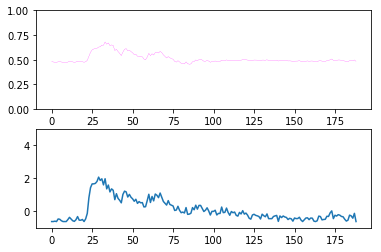

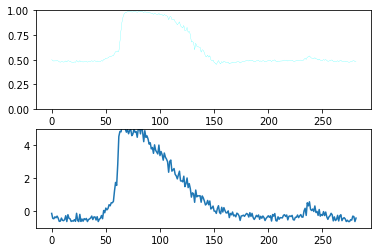

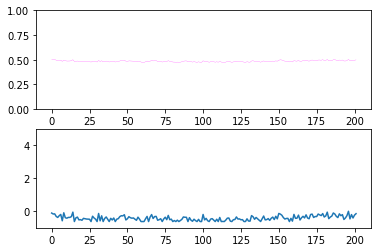

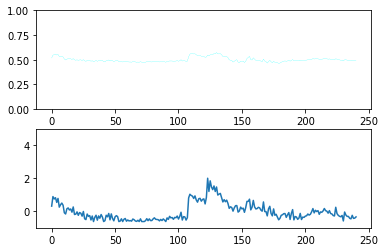

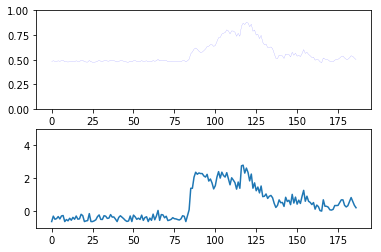

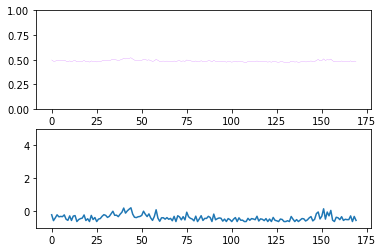

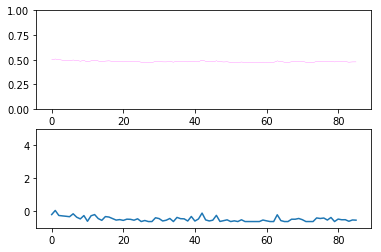

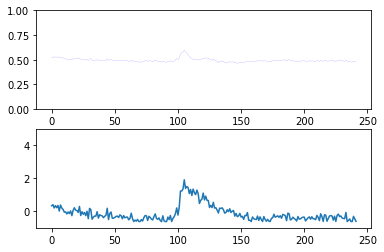

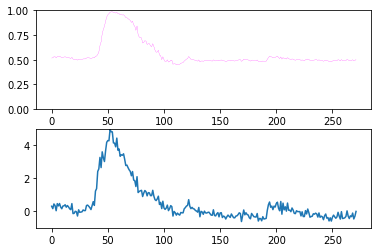

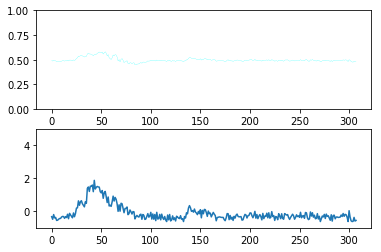

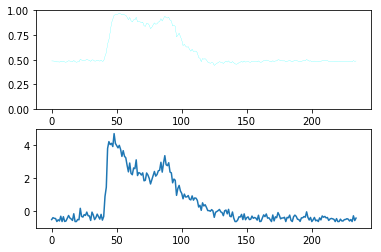

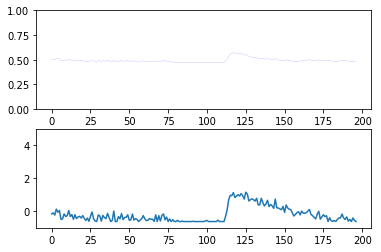

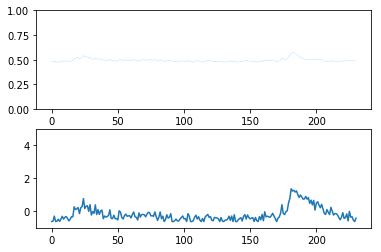

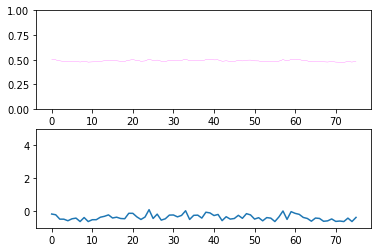

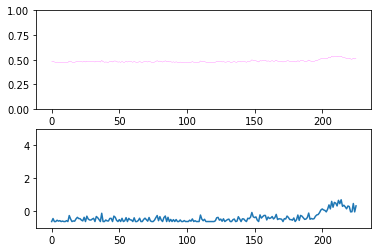

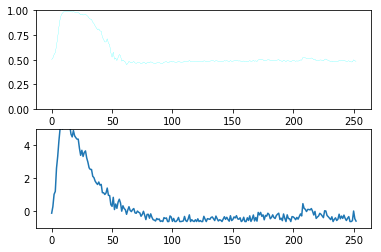

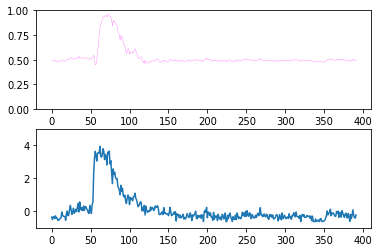

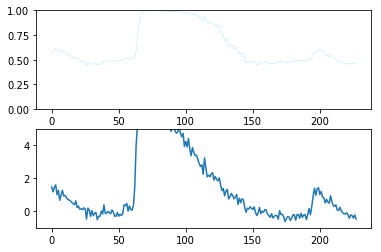

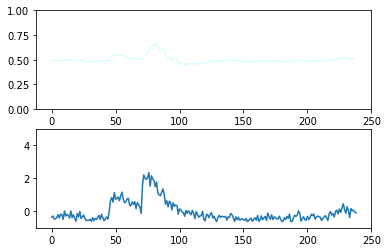

In [70]:

trial_C = []
for (start,stop) in zip(tstarts,tstops):
    trial_C.append(C_z[start:stop,:])
    
for i , (tmppost, tmppos,m) in enumerate(zip(post_i1,trial_pos,d['morphs'])):
    
    if i%5==0:
        f, ax = plt.subplots(2,1)
        ax[0].plot(tmppost[:,200],color=plt.cm.cool(m),linewidth=.2)
        ax[0].set_ylim([0,1])
        ax[1].plot(trial_C[i][:,200])
        ax[1].set_ylim([-1,5])

In [61]:
print(pop_post_i0x_y[0])

[[1.85082392e-001 3.58486141e-001 5.89575354e-005 ... 2.12418236e-036
  5.51506694e-040 1.53838543e-056]
 [1.92570654e-003 4.93233969e-001 1.39238552e-003 ... 7.82386209e-059
  1.60901795e-068 4.21642093e-093]
 [1.75621440e-004 4.94144553e-001 1.76978803e-003 ... 2.79575882e-082
  6.31710319e-091 1.54101194e-121]
 ...
 [7.02922497e-035 8.09584747e-040 1.66328823e-040 ... 2.54801284e-100
  2.95327158e-113 5.37788767e-157]
 [9.96620938e-035 5.06076004e-038 1.12944350e-038 ... 6.59844881e-102
  4.18934651e-113 1.73938039e-152]
 [5.55375841e-037 2.59358066e-039 1.08745346e-037 ... 6.20194062e-105
  4.91370526e-113 1.77152620e-148]]


In [97]:
pop_post_lr = []
pop_P0_x, pop_P1_x = [], []
pop_P0, pop_P1 = [],[]
for tmp0, tmp1 in zip(post_i0x_y,post_i1x_y):
    print(tmp0.shape)
    
    P0 = np.squeeze(tmp0.sum(axis=1))
    P1 = np.squeeze(tmp1.sum(axis=1))
    
    #P0_x = np.log(tmp0).sum(axis=2)
    #P0_x -= P0_x.max() -1
    #print(P0_x)
    #P0_x = np.exp(P0_x)
   # 
    #P1_x = np.log(tmp1).sum(axis=2)
    #P1_x -= P1_x.max() -1 
    #print(P1_x)
    #P1_x = np.exp(P1_x)
    
    #denom = P0_x.sum(axis=1) + P1_x.sum(axis=1)
    #print(denom.shape)
    #P0_x = np.divide(P0_x,np.matlib.repmat(denom[np.newaxis].T,1,P0_x.shape[1]))
    #P1_x = np.divide(P1_x,np.matlib.repmat(denom[np.newaxis].T,1,P1_x.shape[1]))
    
    #P0 = P0_x.sum(axis)
    
    #pop_P0_x.append(P0_x)
    #pop_P1_x.append(P1_x)
    
    #pop_P0.append(P0_x.sum(axis=1))
    #pop_P1.append(P1_x.sum(axis=1))
    
    #pop_post_lr.append(np.divide(P0_x.sum(axis=1),P1_x.sum(axis=1)))
    pop_post_lr.append(np.divide(np.log(P0).sum(axis=1),np.log(P1).sum(axis=1)))

(381, 92, 1637)
(258, 92, 1637)
(250, 92, 1637)
(256, 92, 1637)
(240, 92, 1637)
(189, 92, 1637)
(215, 92, 1637)
(102, 92, 1637)
(180, 92, 1637)
(243, 92, 1637)
(282, 92, 1637)
(247, 92, 1637)
(200, 92, 1637)
(199, 92, 1637)
(208, 92, 1637)
(202, 92, 1637)
(164, 92, 1637)
(82, 92, 1637)
(213, 92, 1637)
(220, 92, 1637)
(241, 92, 1637)
(225, 92, 1637)
(274, 92, 1637)
(186, 92, 1637)
(226, 92, 1637)
(187, 92, 1637)
(1637, 92, 1637)
(217, 92, 1637)
(172, 92, 1637)
(220, 92, 1637)
(170, 92, 1637)
(246, 92, 1637)
(421, 92, 1637)
(80, 92, 1637)
(263, 92, 1637)
(86, 92, 1637)
(232, 92, 1637)
(301, 92, 1637)
(236, 92, 1637)
(93, 92, 1637)
(242, 92, 1637)
(412, 92, 1637)
(363, 92, 1637)
(81, 92, 1637)
(298, 92, 1637)
(272, 92, 1637)
(232, 92, 1637)
(224, 92, 1637)
(303, 92, 1637)
(211, 92, 1637)
(308, 92, 1637)
(198, 92, 1637)
(209, 92, 1637)
(213, 92, 1637)


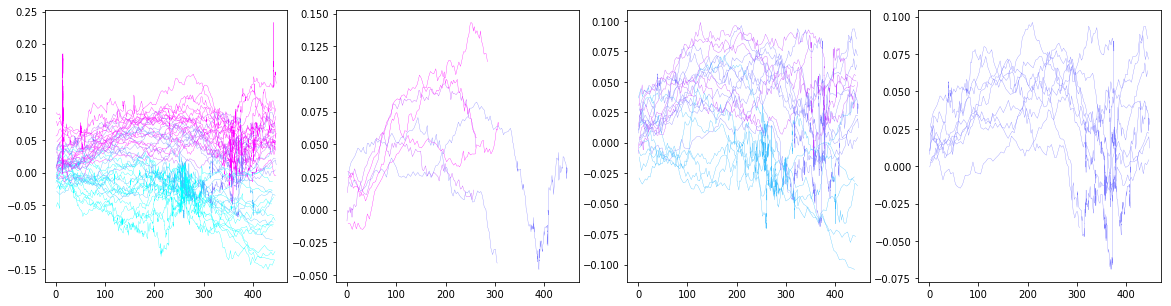

In [100]:
f,ax = plt.subplots(1,4,figsize=[20,5])
for (lr,pos,m,r)  in zip(pop_post_lr,trial_pos,d['morphs'],d['rewards']): #zip(pop_post_lr,trial_pos,d['morphs'],d['rewards']):
    if r>0:
        ax[0].plot(pos[:],np.log(lr[1:]),color=plt.cm.cool(m),linewidth=.3)
        #ax[0].set_ylim([-.3,.3])
    if r<1:
        ax[1].plot(pos[:],np.log(lr[1:]),color=plt.cm.cool(m),linewidth=.3)
        #ax[1].set_ylim([-.3,.3])
    if m>0 and m<1:
        ax[2].plot(pos[:],np.log(lr[1:]),color=plt.cm.cool(m),linewidth=.3)
        #ax[2].set_ylim([-.3,.3])
    if m==.5:
        ax[3].plot(pos[:],np.log(lr[1:]),color=plt.cm.cool(m),linewidth=.3)
        #ax[3].set_ylim([-.3,.3])

In [65]:
######## population switching model, not cell switching model is below #######################################


# run population decoder
pop_post_i0x_y, pop_post_i1x_y= [],[]
pop_post_i0 ,pop_post_i1 = [],[]
dx = 5
for trial,I  in enumerate(d['morphs']):
    if trial%5==0:
        print(trial)
        
    a = 1
    b = 1
    cz = trial_C_z[trial]
    post_trial0, post_trial1 = [],[]
    for j in range(cz.shape[0]):
        if j==0: # if first timepoint, set initial conditions
            
            # set probability of being in current position to 1
            onehot = .001*np.ones([p_xx_i0.shape[1],1])
            onehot[0] = 1.
            onehot = onehot/onehot.ravel().sum()
            
            # multiply by likelihood and prior on being in context
            #tmp0 = .5*np.dot(onehot,trial_l0[trial][j,:][np.newaxis])
            tmp0 = .5*onehot
            #tmp1 = .5*np.dot(onehot,trial_l1[trial][j,:][np.newaxis])
            tmp1 = .5*onehot
            # normalization factor
            tmp_denom = tmp0.sum(axis=0)+tmp1.sum(axis=0)
            #tmp_denom = np.dot(np.ones([p_xx_i0.shape[0],1]),tmp_denom[np.newaxis])

            # posterior having observed 1 time frame
            #Z0_t = np.divide(tmp0,tmp_denom)
            Z0_t = tmp0/tmp_denom
            #Z1_t = np.divide(tmp1,tmp_denom)
            Z1_t = tmp1/tmp_denom


        
            # calculate integrand - belief state transition prob x position transition matrix x posterior at previous timepoint
        
        ## single cell decoding
        #print(a.shape)
       
        XZ0 = np.dot(p_xx_i0.T,a*Z0_t) + np.dot(p_xx_i1.T,(1-a)*Z1_t)
        XZ1 = np.dot(p_xx_i0.T,(1-b)*Z0_t) + np.dot(p_xx_i1.T,b*Z1_t)
        
        # make activity into a matrix and means at each position into a matrix in order to calculate likelihoods
        CZX = np.matlib.repmat(cz[j,:],mu_i0.shape[0],1)
        
        #calculate likelihoods as a function of binned position
        l0 = gaussian_pdf(CZX,mu_i0,1)
        l1 = gaussian_pdf(CZX,mu_i1,1)
        # normalize from binning
        denom = np.matlib.repmat(l0.sum(axis=0) + l1.sum(axis=0),mu_i0.shape[0],1)
        l0 = np.divide(l0,denom)
        l1 = np.divide(l1,denom)
        
        
        # population log-likelihood of current activity as a function of position
        log_L0 = np.log(l0).sum(axis=1)
        log_L1 = np.log(l1).sum(axis=1)
        
        # numerator of new posterior
        # first calculate in log space
        log_tmpnum0 = log_L0 + np.squeeze(np.log(XZ0))
        # bring back to values that won't overflow
        log_tmpnum0 -= log_tmpnum0.max()-1
        # back to normal space
        tmpnum0 = np.exp(log_tmpnum0)
        
        # repeat
        log_tmpnum1 = log_L1 + np.squeeze(np.log(XZ1))
        log_tmpnum1 -= log_tmpnum1.max()-1
        tmpnum1 = np.exp(log_tmpnum1)
        
        # normalization factor for updated posterior
        tmp_denom = tmpnum0.sum(axis=0)+tmpnum1.sum(axis=0)
        

        # new posterior
        Z0_t = tmpnum0/tmp_denom
        Z1_t = tmpnum1/tmp_denom

        #print(Z0_t.shape)
        # add to list for trial
        post_trial0.append(Z0_t)
        post_trial1.append(Z1_t)
    
    # append trials posterior to list
    pop_post_i0x_y.append(np.array(post_trial0))
    pop_post_i1x_y.append(np.array(post_trial1))
    # sum across positions to get posterior of context
    pop_post_i1.append(np.squeeze(np.array(post_trial1).sum(axis=1)))
    pop_post_i0.append(np.squeeze(np.array(post_trial0).sum(axis=1)))            
    
    
    
    
    
    

0


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log


5
10
15
20
25
30
35
40
45


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


50
55
60
65
70
75
80
85
90
95
100
105
110
